In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem Statement

**Price Prediction of AirBnB Listing based on various factors like location, area, listing space type, Number of nights, number of Reviews, ect.**

# Import all required Packages

In [23]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import the dataset

In [24]:
air = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb nyc 2019/AB_NYC_2019.csv')

In [25]:
air.shape

(48895, 16)

In [26]:
air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
air.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [28]:
air.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [29]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [30]:
air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# EDA and Preprocessing

In [31]:
# converting to date format
air['last_review'] = pd.to_datetime(air['last_review'])

In [32]:
air['year_of_last_review'] = air['last_review'].dt.year
air['month_of_last_review'] = air['last_review'].dt.month
air['day_of_last_review'] = air['last_review'].dt.day

In [33]:
# droping unwanted columns
air.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis = 1, inplace = True)

In [34]:
air.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
year_of_last_review               float64
month_of_last_review              float64
day_of_last_review                float64
dtype: object

In [35]:
cat_var = [c for c in air.columns if air[c].dtypes == 'object']
num_var = [n for n in air.columns if n not in cat_var and n != 'price']

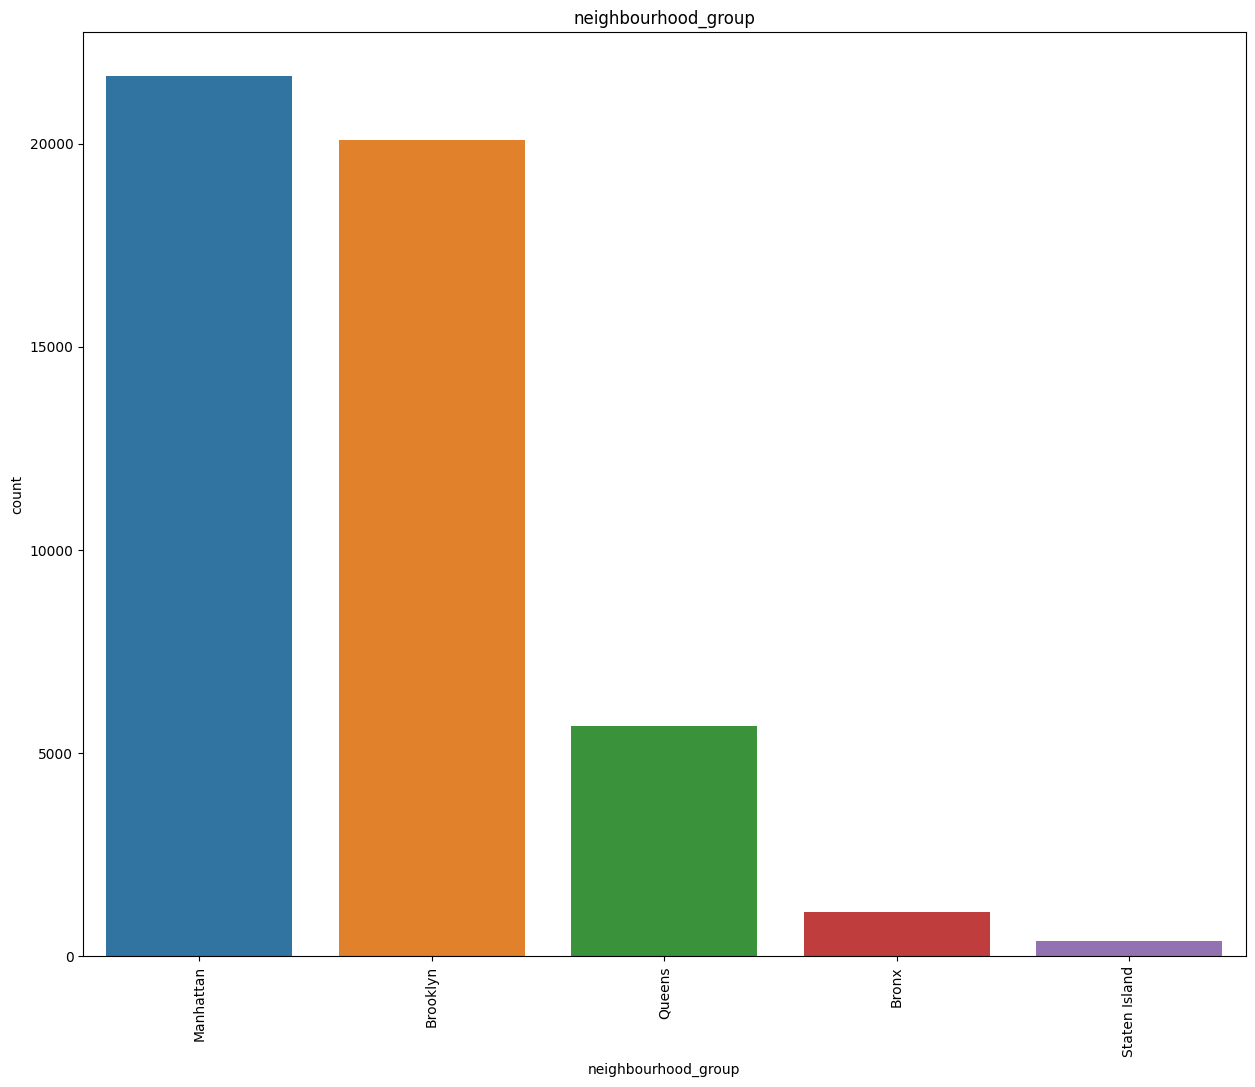

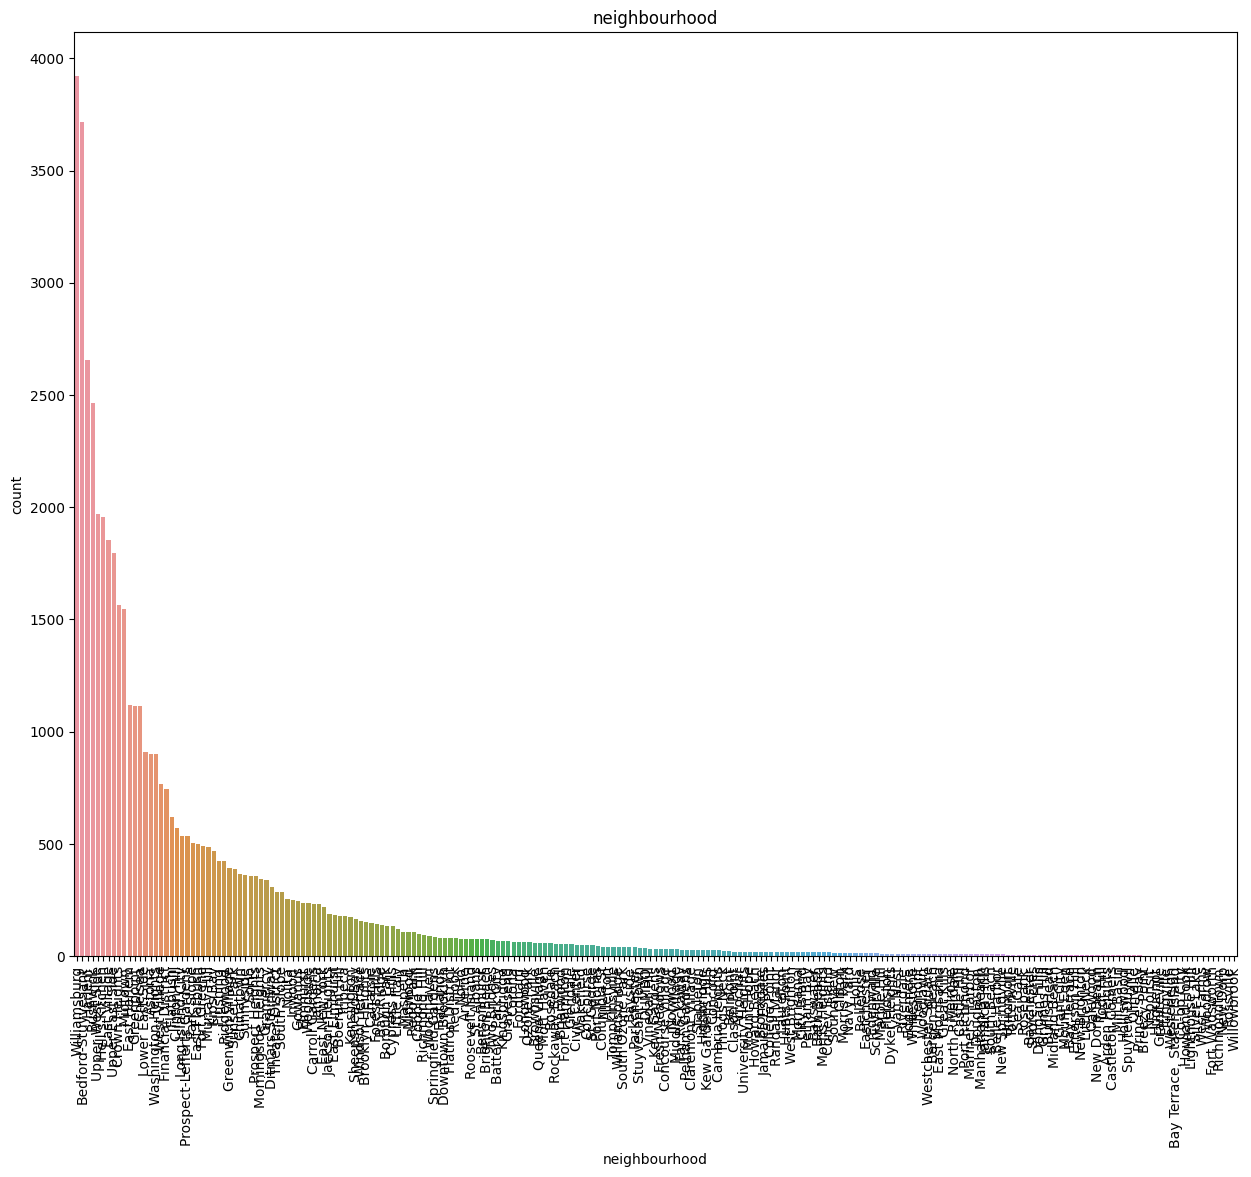

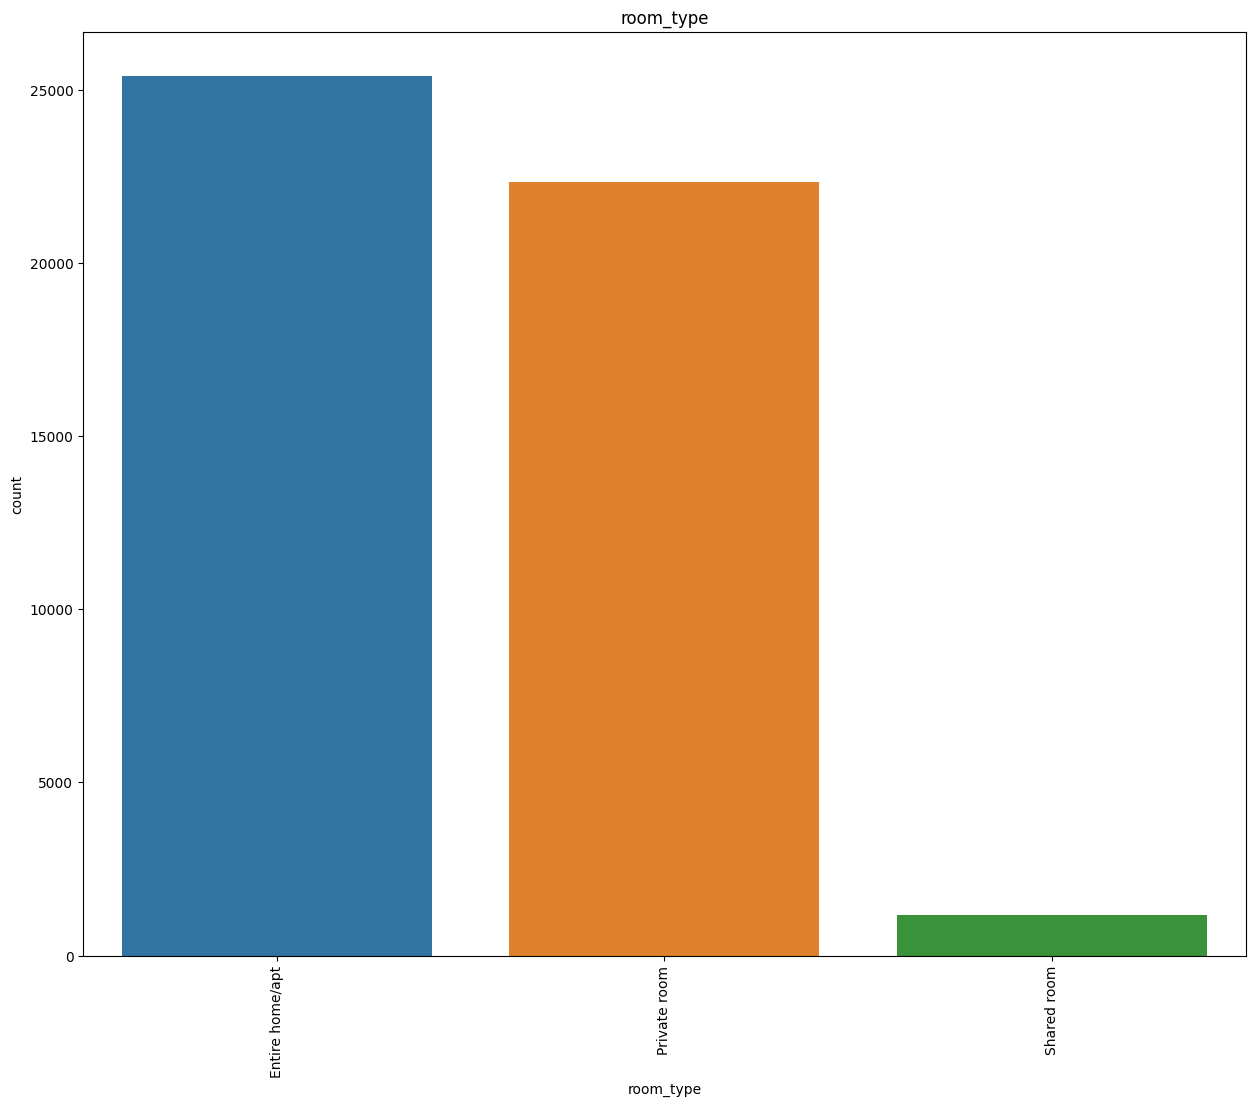

In [36]:
# countplot
for i in cat_var:
  plt.figure(figsize = (15,12))
  sns.countplot(x = i, data = air, order = air[i].value_counts().index)
  plt.xticks(rotation = 90)
  plt.title(i)
  plt.show()

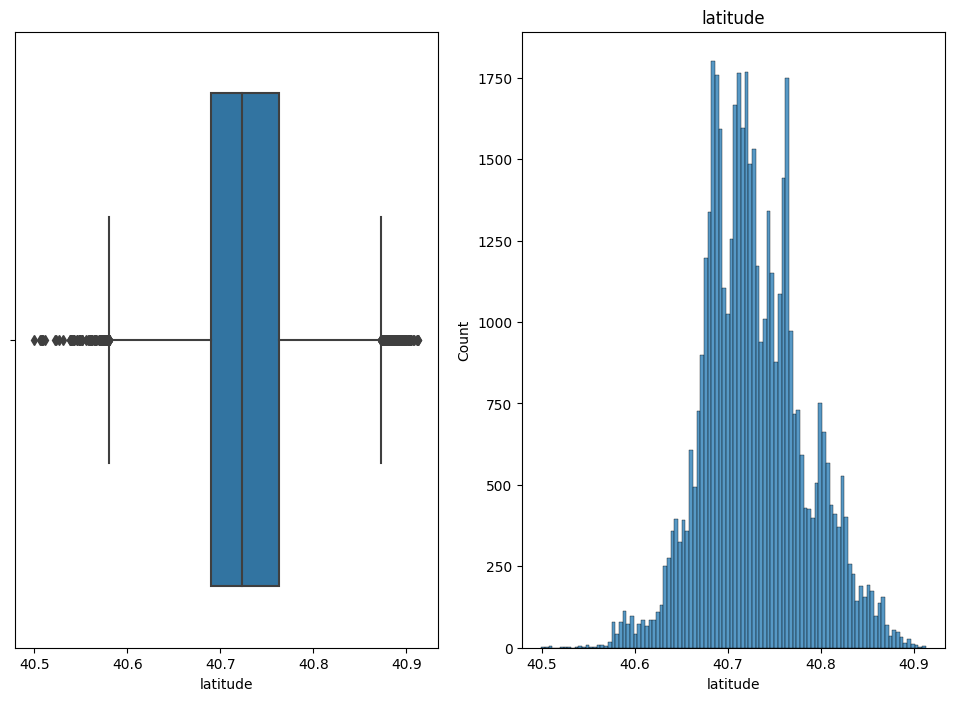

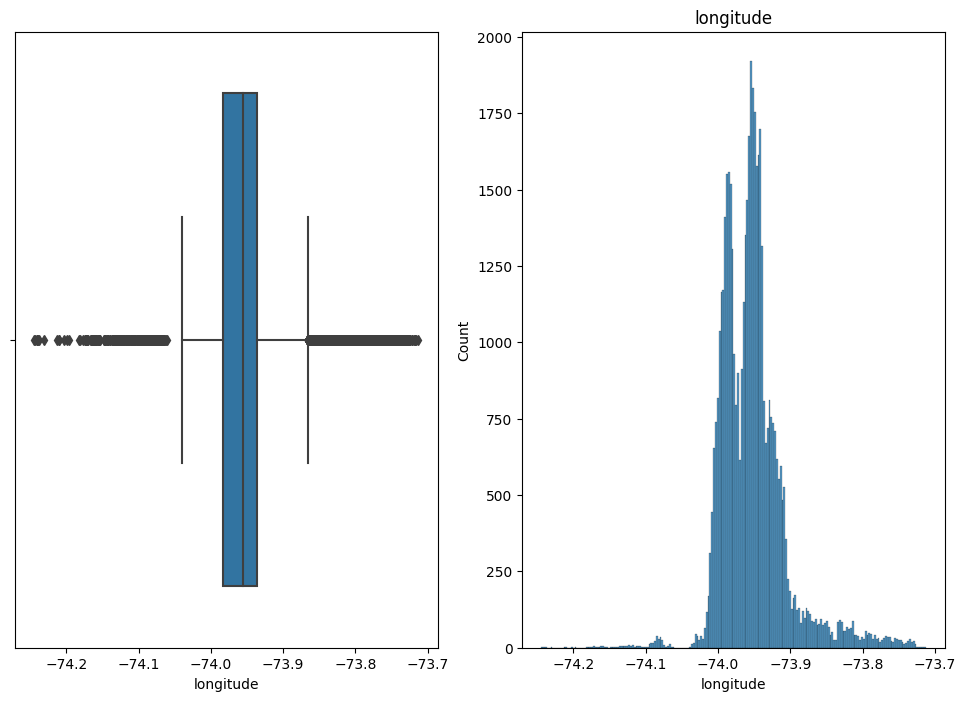

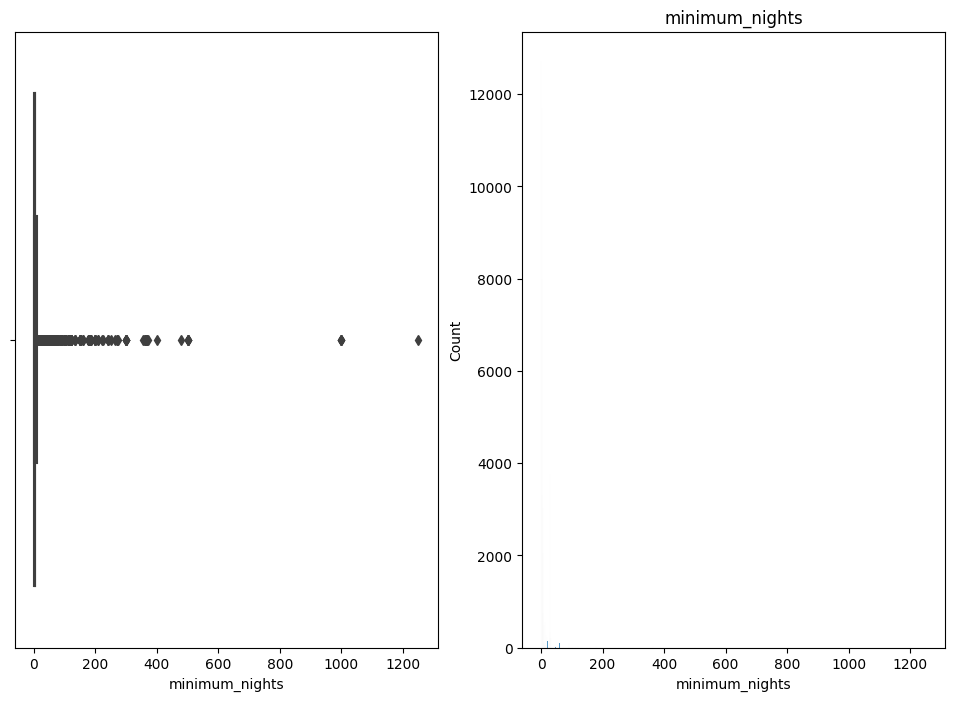

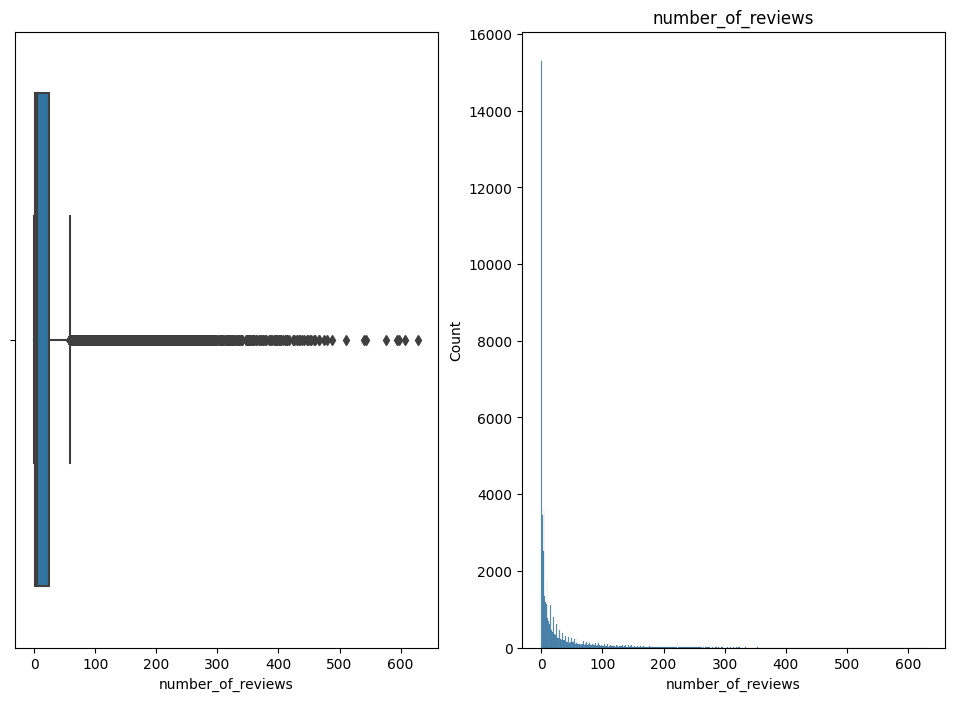

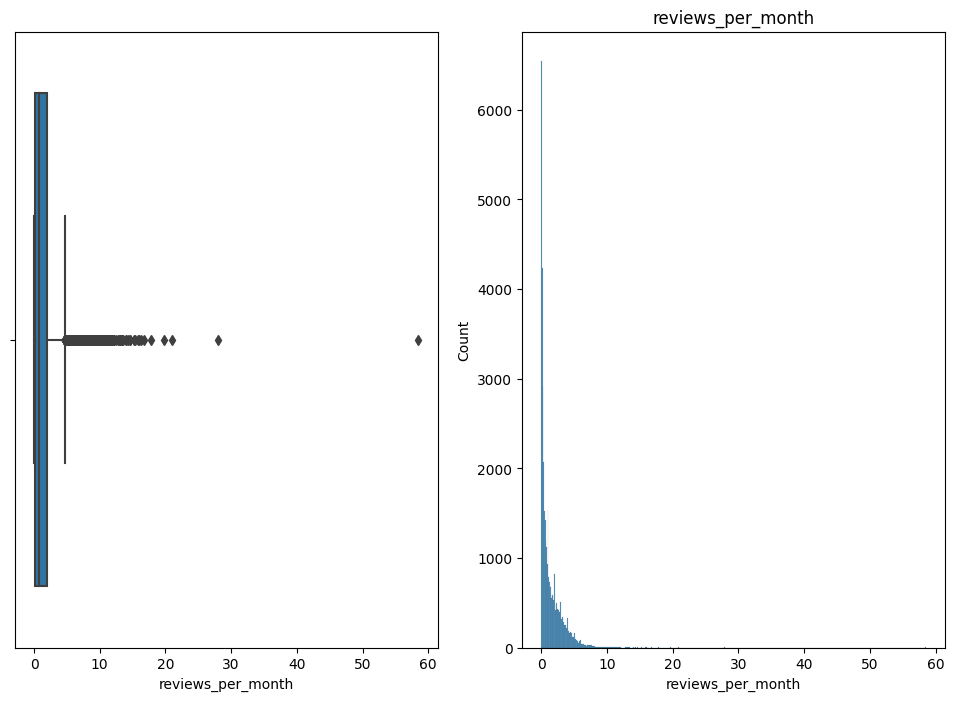

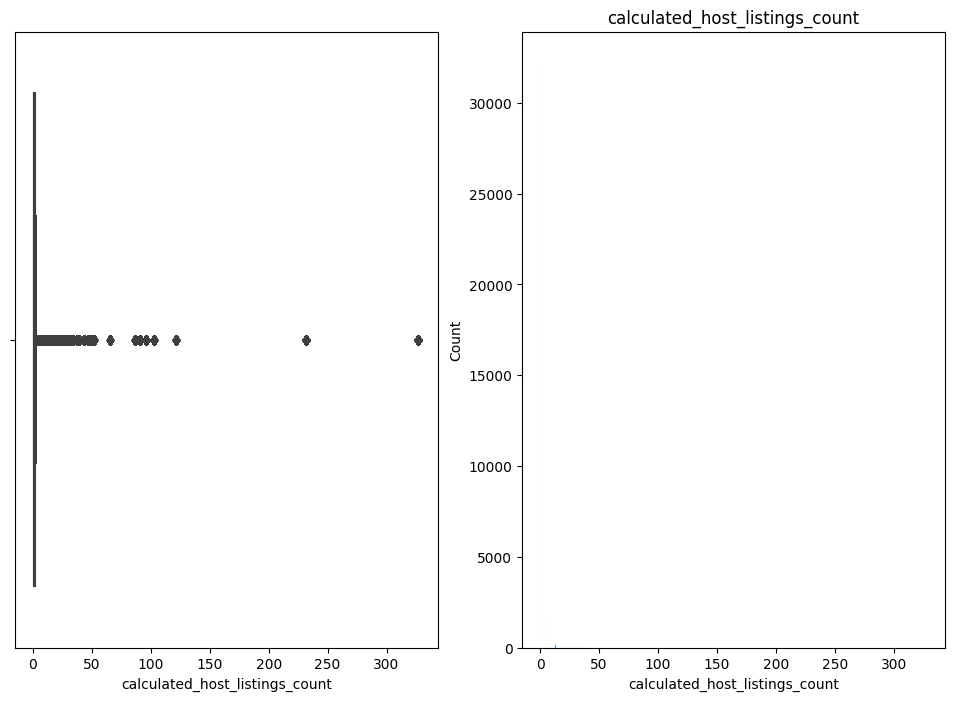

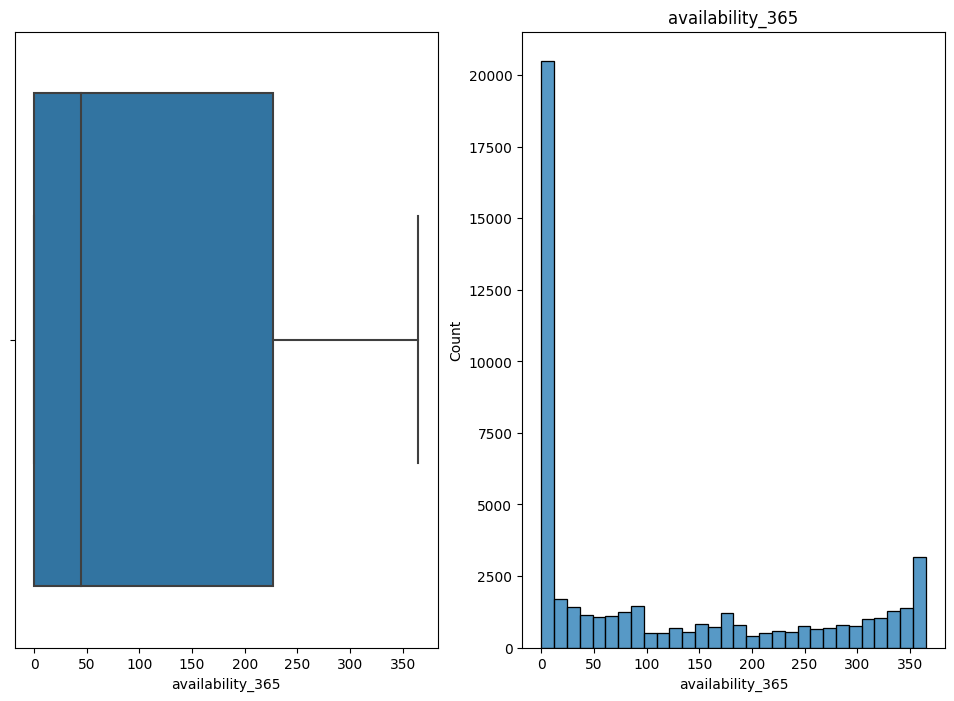

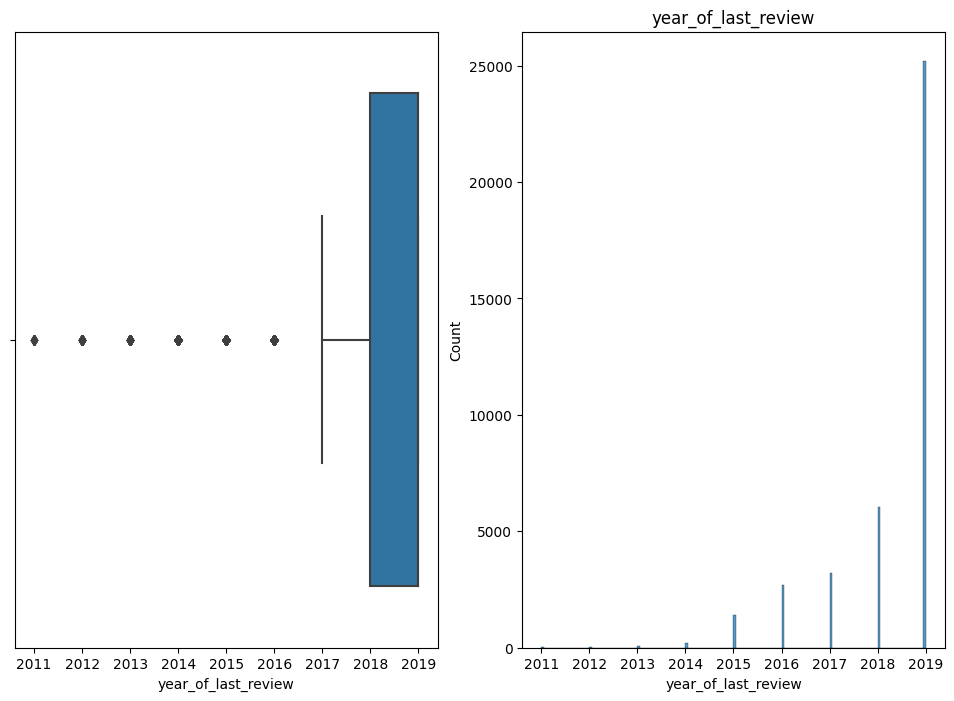

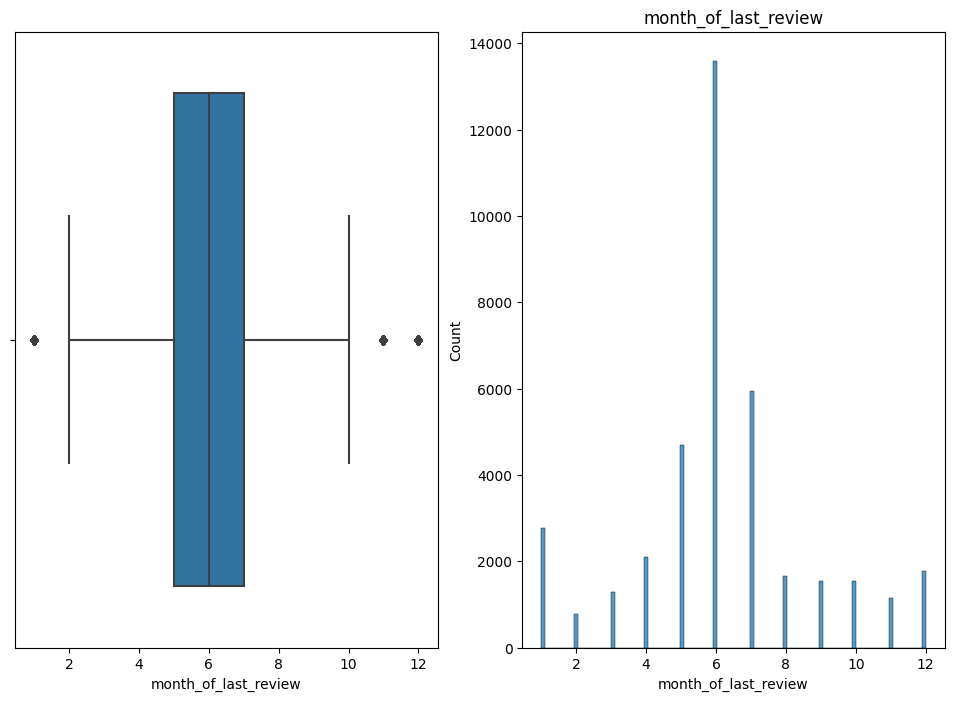

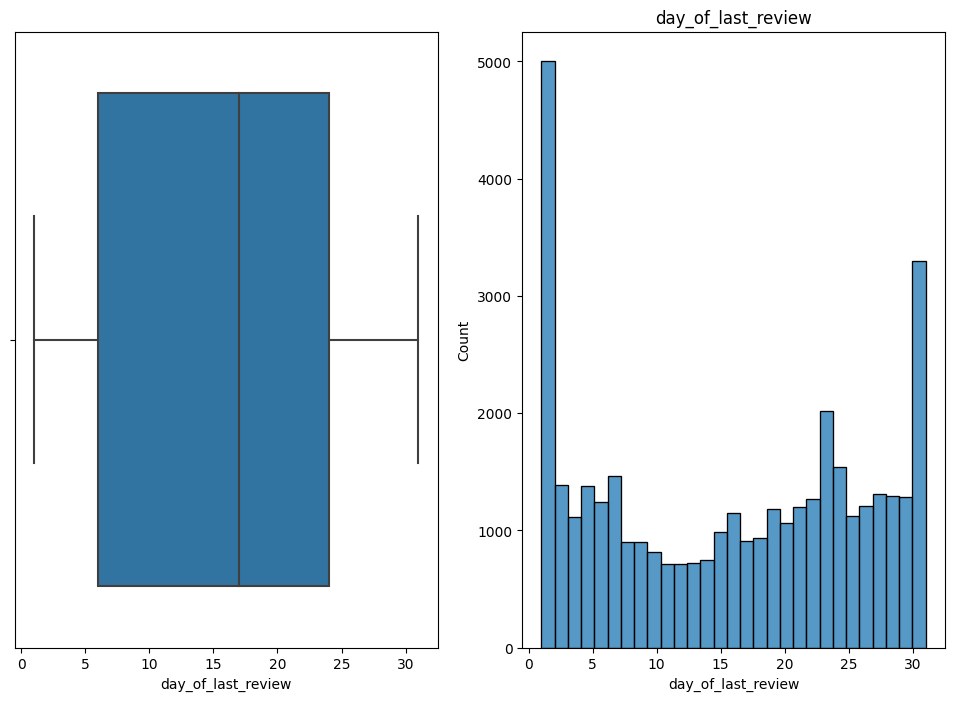

In [37]:
# Boxplot and Histogram
for j in num_var:
  fig, ax =plt.subplots(1,2, figsize=(12,8))
  sns.boxplot(x = j, data = air, ax = ax[0])
  sns.histplot(x = j, data = air, ax = ax[1])
  plt.title(j)
  plt.show()

Text(0.5, 1.0, 'price based on different location')

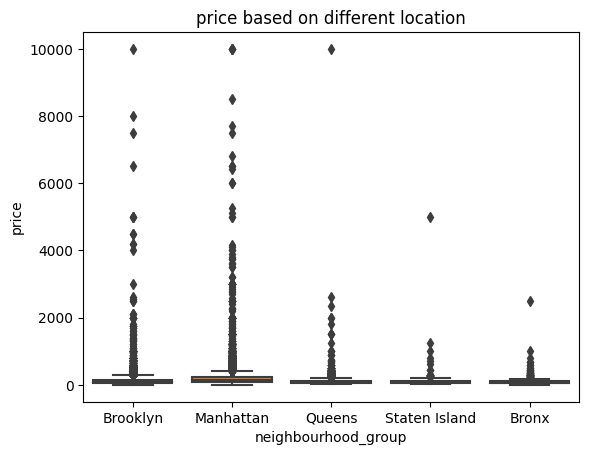

In [38]:
# price distibution based on location
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = air)
plt.title('price based on different location')

<Axes: xlabel='room_type', ylabel='price'>

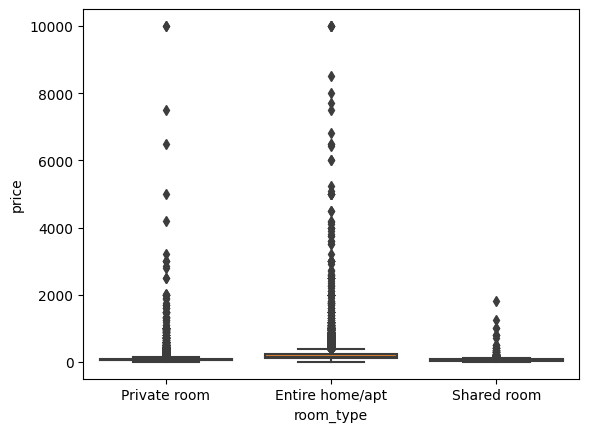

In [39]:
# price distribution based on room type
sns.boxplot(x = 'room_type', y = 'price', data = air)

In [40]:
# checking for duplicate record.
air.duplicated().sum()

0

In [41]:
# checking for null values
air.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
year_of_last_review               10052
month_of_last_review              10052
day_of_last_review                10052
dtype: int64

In [42]:
air['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

In [43]:
s = air[air['number_of_reviews'] == 0]

In [44]:
s.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
year_of_last_review               10052
month_of_last_review              10052
day_of_last_review                10052
dtype: int64

In [45]:
air.fillna(0, inplace = True)

In [46]:
air.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
year_of_last_review               0
month_of_last_review              0
day_of_last_review                0
dtype: int64

# Dummification

In [47]:
air = pd.get_dummies(columns=['neighbourhood_group','room_type'], data=air, prefix=['neighbourhood_group','room_type'], prefix_sep="_",drop_first=True)

In [48]:
le= LabelEncoder()

In [49]:
le.fit(air['neighbourhood'])

LabelEncoder()

In [50]:
neigh = le.transform(air['neighbourhood'])

In [51]:
neigh = pd.DataFrame(neigh, columns = ['neighbourhoods'])

In [52]:
air = pd.concat([air, neigh], axis = 1)

In [53]:
air.columns

Index(['neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'year_of_last_review', 'month_of_last_review', 'day_of_last_review',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Private room', 'room_type_Shared room', 'neighbourhoods'],
      dtype='object')

In [54]:
air.drop(['neighbourhood'], axis = 1, inplace = True)

In [55]:
air.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'year_of_last_review', 'month_of_last_review',
       'day_of_last_review', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Private room',
       'room_type_Shared room', 'neighbourhoods'],
      dtype='object')

In [56]:
air.shape

(48895, 18)

# Correlation

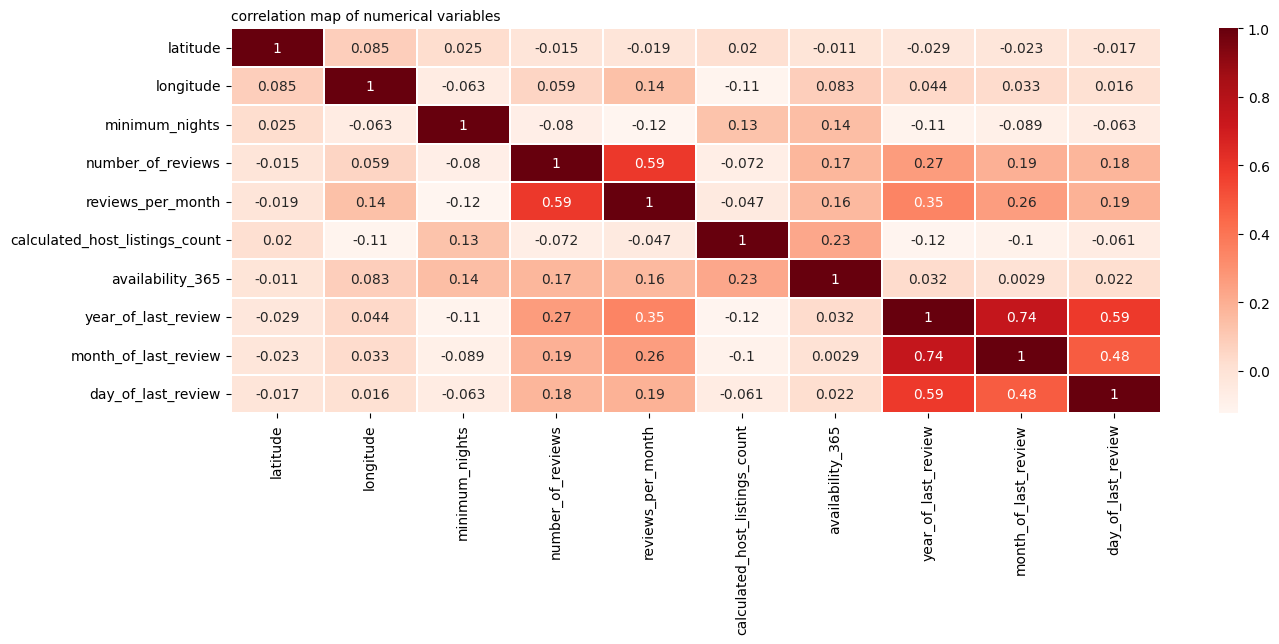

In [57]:
plt.figure(figsize = (15,5))
sns.heatmap(air[num_var].corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.title('correlation map of numerical variables', fontsize='10', fontfamily='sans-serif', loc='left')
plt.show()

In [58]:
corr = abs(air.corr())['price']
print(corr.sort_values(ascending = False))

price                                1.000000
room_type_Private room               0.240246
neighbourhood_group_Manhattan        0.163976
longitude                            0.150019
neighbourhood_group_Brooklyn         0.098603
year_of_last_review                  0.085167
availability_365                     0.081829
neighbourhood_group_Queens           0.080205
neighbourhoods                       0.062057
month_of_last_review                 0.061351
calculated_host_listings_count       0.057472
day_of_last_review                   0.054232
room_type_Shared room                0.053613
reviews_per_month                    0.050564
number_of_reviews                    0.047954
minimum_nights                       0.042799
latitude                             0.033939
neighbourhood_group_Staten Island    0.013840
Name: price, dtype: float64


# Train-Test split

In [59]:
X = air.drop(['price'], axis = 1)
y = air['price']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 67)

# Standard Scaling

In [61]:
st = StandardScaler()

In [62]:
X_train = st.fit_transform(X_train)

In [63]:
X_test = st.fit_transform(X_test)

# Model Building

In [64]:
def eval_metric(train_pred, test_pred, y_train, y_test):
  print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
  print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

  print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
  print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

  print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
  print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

  print("The r2 scorce on train dataset: {} \n".format(r2_score(y_pred=train_pred,y_true=y_train)))
  print("The r2 scorce on test dataset: {} \n".format(r2_score(y_pred=test_pred,y_true=y_test)))


### 1)Linear Regression

In [73]:
LR = LinearRegression()

LR.fit(X_train, y_train)

lr_train_pred = LR.predict(X_train)
lr_test_pred = LR.predict(X_test)

eval_metric(lr_train_pred, lr_test_pred, y_train, y_test)

The Mean Absolute Error on train dataset: 71.27099577994466 

The Mean Absolute Error on test dataset: 76.9190552048133 

The Mean Squared Error on train dataset: 44575.335347655906 

The Mean Squared Error on test dataset: 68257.90361063906 

The Root Mean Squared Error on train dataset: 211.12871748688264 

The Root Mean Squared Error on test dataset: 261.26213581504504 

The r2 scorce on train dataset: 0.11475884469213893 

The r2 scorce on test dataset: 0.08648674640265042 



## 2) decision tree

In [75]:
dt = DecisionTreeRegressor()

dt_param_grid = {'max_depth': [5, 10],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'splitter': ['best', 'random'],
    'min_impurity_decrease': [0.0, 0.1, 0.2]}

dt_grid = GridSearchCV(dt, param_grid = dt_param_grid, cv = 5)
dt_grid.fit(X_train, y_train)

dt_train_pred = dt_grid.predict(X_train)
dt_test_pred = dt_grid.predict(X_test)

eval_metric(dt_train_pred, dt_test_pred, y_train, y_test)

The Mean Absolute Error on train dataset: 68.51515958729999 

The Mean Absolute Error on test dataset: 74.67814613776738 

The Mean Squared Error on train dataset: 44528.23981808217 

The Mean Squared Error on test dataset: 68282.36993444027 

The Root Mean Squared Error on train dataset: 211.01715526961823 

The Root Mean Squared Error on test dataset: 261.30895494498515 

The r2 scorce on train dataset: 0.11569413549106466 

The r2 scorce on test dataset: 0.08615930723623966 



In [76]:
dt_grid.best_params_

{'max_depth': 5,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

3) Random forest

In [77]:
rn = RandomForestRegressor()

rf_param_grid = {'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]}

rn_grid = GridSearchCV(rn, param_grid = rf_param_grid, cv = 5)
rn_grid.fit(X_train, y_train)

rn_train_pred = rn_grid.predict(X_train)
rn_test_pred = rn_grid.predict(X_test)

eval_metric(rn_train_pred, rn_test_pred,y_train, y_test)

The Mean Absolute Error on train dataset: 56.641818942029374 

The Mean Absolute Error on test dataset: 70.46711847782613 

The Mean Squared Error on train dataset: 25095.421453364354 

The Mean Squared Error on test dataset: 62995.45566282967 

The Root Mean Squared Error on train dataset: 158.41534475348135 

The Root Mean Squared Error on test dataset: 250.98895526064422 

The r2 scorce on train dataset: 0.5016190073041773 

The r2 scorce on test dataset: 0.15691545417709707 



In [78]:
rn_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

## 4) gradient boost

In [70]:
gb = GradientBoostingRegressor()

gb.fit(X_train, y_train)

gb_train_pred = gb.predict(X_train)
gb_test_pred = gb.predict(X_test)

eval_metric(gb_train_pred, gb_test_pred, y_train, y_test)

The Mean Absolute Error on train dataset: 63.2542068620558 

The Mean Absolute Error on test dataset: 71.27552187361457 

The Mean Squared Error on train dataset: 36967.065053010476 

The Mean Squared Error on test dataset: 64080.630436604835 

The Root Mean Squared Error on train dataset: 192.26821123891094 

The Root Mean Squared Error on test dataset: 253.14152254540312 

The r2 scorce on train dataset: 0.2658548248568867 

The r2 scorce on test dataset: 0.1423922783121031 

